# Функции радиального распределения частиц, рассчитанные при различных значениях температуры системы.

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 10^{-10}~\varepsilon / k_B$;
   - Коннечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения рассчитывалась через каждые 4000 шагов;
   - Подсчёт состоял из 1500 шагов: 500 на уравновешивание системы при фиксированной температуре и 1000 на усреднение по времени;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

#### Путь к файлам с данными

In [2]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_DATA = os.path.join(BASE_DIRECTORY, 'data')

In [3]:
filename = os.path.join(
    PATH_TO_DATA,
    '2020-11-24',
    'rdf_file_T_',
)

#### Температуры, для которых была подчитана функция радиального распределения

In [4]:
temperatures = (
    0.10016, 0.50026, 0.99817, 1.49752, 1.99767, 2.49888, 2.79396,
)

#### Извлечение данных из файлов

In [5]:
rdf_data = pd.DataFrame(columns=['radius'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})

#### Графики функций радиального распределения при различных температурах

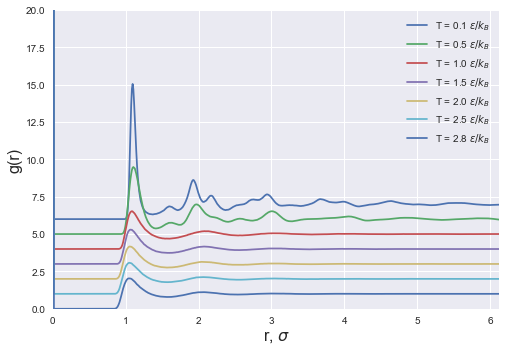

In [6]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$', fontsize=16);
plt.ylabel('g(r)', fontsize=16);
plt.xlim(left=0, right=6.125);
plt.ylim(bottom=0, top=20);
plt.legend();